In [6]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()

In [8]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_train.shape

(60000, 784)

In [16]:
lst = []
type(lst)

list

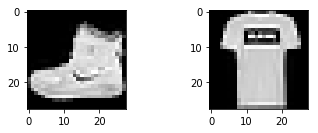

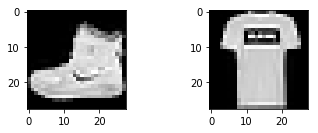

In [2]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.show()


In [3]:
import numpy as np

seed = 7
np.random.seed(seed)
num_pixels = X_train.shape[1] * X_train.shape[2]

In [4]:
from keras.utils import np_utils
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
#select first 10000 rows
X_val = X_train[:10000]
#leave first 10000 rows
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
from keras import regularizers
from keras import models
from keras import layers
from keras import regularizers

# define baseline model
def baseline_model(lmd):
 # create model
 network = models.Sequential()
 network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(lmd), activation='relu', input_shape=(28 * 28,)))
 #network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
 #network.add(layers.Dropout(lmd))
 network.add(layers.Dense(10, activation='softmax'))
 # Compile model
 network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return network

In [6]:
from keras import backend as K
lmd = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#lmd = [0.2, 0.4, 0.5, 0.6, 0.8]
errors = np.zeros(len(lmd))
ii = 0
for l in lmd:
    # Fit the model
    # build the model
    K.clear_session()
    model = baseline_model(l)
    model.fit(X_val, y_val, validation_data=(partial_x_train, partial_y_train), epochs=10, batch_size=150, verbose=0)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    baseline_error = (100-scores[1]*100)
    print("Lambda: %(first).4f ---- Baseline Error: %(second).2f%%" % {"first": l, "second":baseline_error})
    errors[ii] = baseline_error
    ii = ii + 1


Lambda: 0.0001 ---- Baseline Error: 14.81%
Lambda: 0.0001 ---- Baseline Error: 14.81%
Lambda: 0.0010 ---- Baseline Error: 15.79%
Lambda: 0.0010 ---- Baseline Error: 15.79%
Lambda: 0.0100 ---- Baseline Error: 20.08%
Lambda: 0.0100 ---- Baseline Error: 20.08%
Lambda: 0.1000 ---- Baseline Error: 26.18%
Lambda: 0.1000 ---- Baseline Error: 26.18%
Lambda: 1.0000 ---- Baseline Error: 30.34%
Lambda: 1.0000 ---- Baseline Error: 30.34%
Lambda: 10.0000 ---- Baseline Error: 39.65%
Lambda: 10.0000 ---- Baseline Error: 39.65%
Lambda: 100.0000 ---- Baseline Error: 55.73%
Lambda: 100.0000 ---- Baseline Error: 55.73%


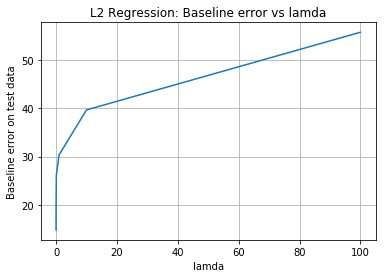

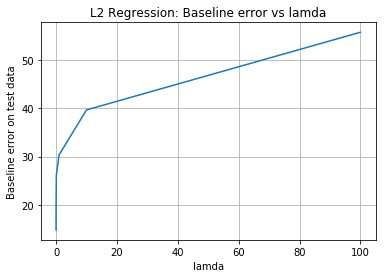

In [7]:
fig = plt.figure()
ax = plt.axes()
l = lmd
e = errors
ax.plot(l, e);
ax.axis('tight');
ax.set(xlabel='lamda', ylabel='Baseline error on test data',
       title='L2 Regression: Baseline error vs lamda');
    
#ax.set(xlabel='Fraction of the input units dropped', ylabel='Baseline error on test data',
  #     title='Baseline error vs drop out rate');

#for xy in zip(l, e):                                       # <--
  #ax.annotate('(%.1f, %i)' % xy, xy=xy, textcoords='data') # <--

plt.grid()
plt.show()